In [6]:
import sys
sys.path.insert(0,'..')

from src.models import *
from src.loss_functions import *
from src.noise import *
from src.metrics import *
from src.plotting import *
from src.generate_data import *

In [7]:
path = "/h/snagaraj/noise_multiplicity/data/processed/"
filename = generate_filename("MNIST", 1000)

X_train, X_test, y_train, y_test = load_data(filename, path)

    
noise_transition_matrix = np.array([[0.7, 0.3], [0.3, 0.7]])
y_train_noisy = add_label_noise(y_train, noise_transition_matrix)


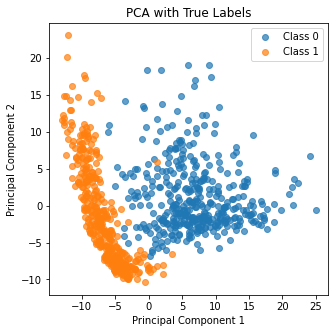

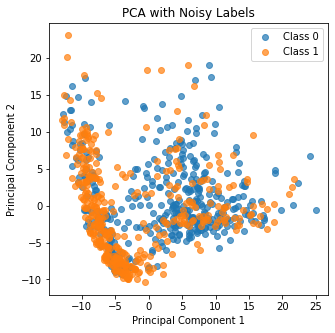

In [8]:
plt.figure(figsize=(5, 5))
#plt.subplot(1, 2, 1)
visualize_pca(X_train, y_train, 'PCA with True Labels')
plt.figure(figsize=(5, 5))

visualize_pca(X_train, y_train_noisy, 'PCA with Noisy Labels')


In [9]:
num_models=100
num_epochs = 150

correction_types = [("NONE", "Noisy Labels - Uncorrected"), 
                    ("forward", "Noisy Labels - Forward"), 
                    ("backward", "Noisy Labels - Backward"), 
                    ("NONE", "Clean Labels")]

probabilities_dict = {}
accuracies_dict = {}

for correction_type, label in correction_types:
    y_train_used = y_train_noisy if "Noisy" in label else y_train
    predicted_probabilities, accuracies = train_LR_model_variance(X_train, 
                                                                  y_train_used, 
                                                                  X_test, 
                                                                  y_test, 
                                                                  num_models=num_models, 
                                                                  num_epochs=num_epochs, 
                                                                  correction_type=correction_type,
                                                                  noise_transition_matrix=noise_transition_matrix if "Noisy" in label else None)
    probabilities_dict[label] = predicted_probabilities
    accuracies_dict[label] = accuracies
    
disagreement_dict = {}

for label, probabilities in probabilities_dict.items():
    disagreement_rate = estimate_disagreement(probabilities)
    disagreement_dict[label] = disagreement_rate



  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

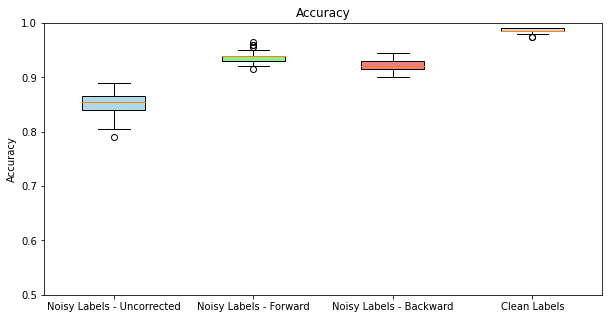

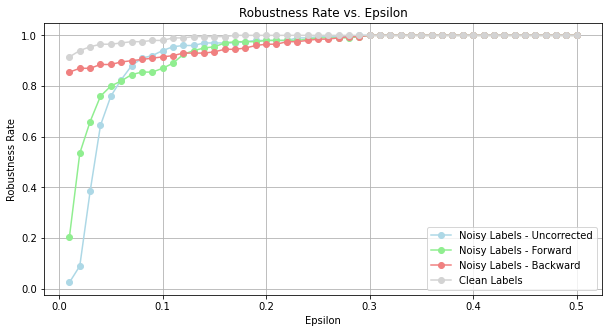

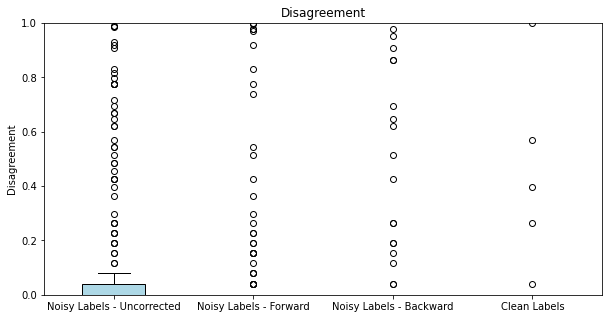

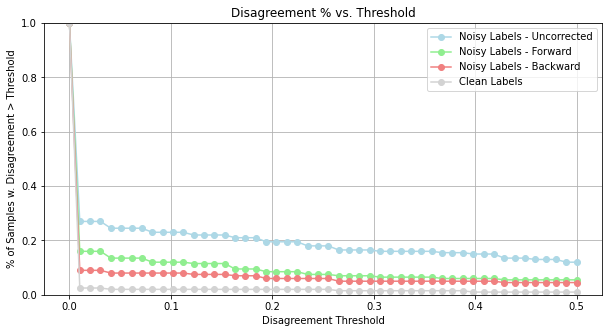

In [10]:
plot_boxplot(accuracies_dict)
plot_robustness_rates(probabilities_dict)
plot_boxplot(disagreement_dict, y_range=(0.0, 1), title="Disagreement")
plot_disagreement_percentage(probabilities_dict)

# Misspecifying Noise

In [34]:
noise_transition_matrix_est = np.array([[0.9, 0.1], [0.1, 0.9]])

In [35]:
num_models=100
num_epochs = 50

correction_types = [("NONE", "Noisy Labels - Uncorrected"), 
                    ("forward", "Noisy Labels - Forward"), 
                    ("backward", "Noisy Labels - Backward"), 
                    ("NONE", "Clean Labels")]

probabilities_dict = {}
accuracies_dict = {}

for correction_type, label in correction_types:
    y_train_used = y_train_noisy if "Noisy" in label else y_train
    predicted_probabilities, accuracies = train_LR_model_variance(X_train, 
                                                                  y_train_used, 
                                                                  X_test, 
                                                                  y_test, 
                                                                  num_models=num_models, 
                                                                  num_epochs=num_epochs, 
                                                                  correction_type=correction_type,
                                                                  noise_transition_matrix=noise_transition_matrix_est if "Noisy" in label else None)
    probabilities_dict[label] = predicted_probabilities
    accuracies_dict[label] = accuracies
    
disagreement_dict = {}

for label, probabilities in probabilities_dict.items():
    disagreement_rate = estimate_disagreement(probabilities)
    disagreement_dict[label] = disagreement_rate


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

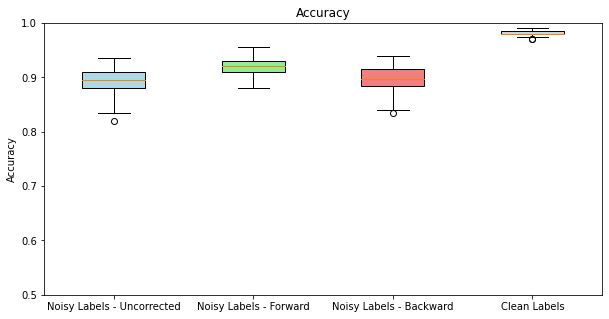

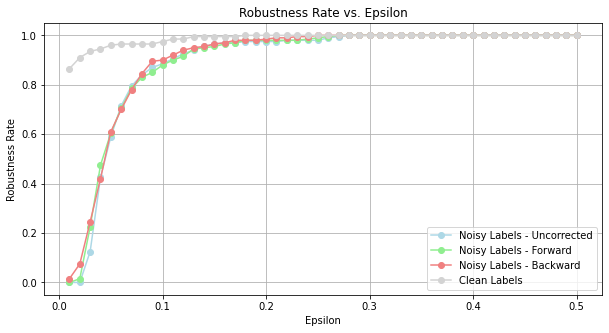

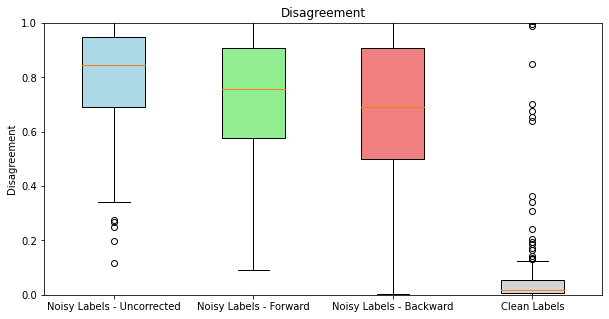

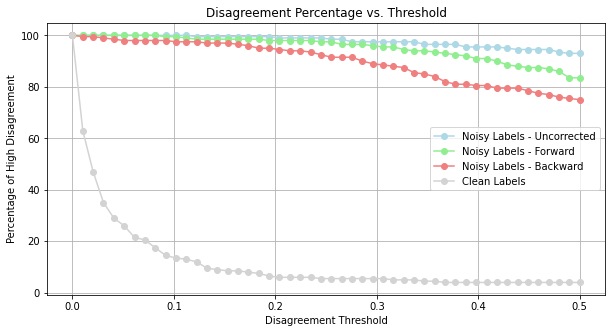

In [36]:
plot_boxplot(accuracies_dict)
plot_robustness_rates(probabilities_dict)
plot_boxplot(disagreement_dict, y_range=(0.0, 1), title="Disagreement")
plot_disagreement_percentage(probabilities_dict)